`Lab creado por Margarita Geleta para el curso Introducción a Machine Learning JEDI, edición 2021`

# [IV] Regresión

El objetivo de la regresión es predecir un valor de una o varias variables numéricas $y$ a partir de un vector $d$-dimensional $x \in \mathbb{R}^d$ de variables de entrada.

$$y_i = f(x_i) + \epsilon_i $$

$f(x_i)$ es una función determinista que no podremos encontrar nunca porque el error $\epsilon_i$ nos lo estropea todo. No podremos encontrar una aproximación de $y_i$, $\hat{y_i}$. Por ejemplo, si ajustamos a un polinomio:

$$\hat{y_i} = f(x_i,w) = w_0 + w_1x + w_2x^2 + ... + w_mx^m =\sum_{j=0}^m w_jx^j$$

Minimizando la suma de cuadrados:

$$ E(w) = \frac{1}{2} \sum_{i=0}^n (f(x_i,w)-y_i)^2$$

Fíjate que tenemos un **hiperparámetro** que es $m$.

Si añadimos regularización:

$$ E(w) = \frac{1}{2} \sum_{i=0}^n (f(x_i,w)-y_i)^2 + \frac{\lambda}{2}||w||^2$$

Tenemos otro hiperparámetro más, $\lambda$. Este tipo de regularización se conoce por el nombre de regularización de Tikhonov o $L_2$ (regresión ridge). También existe regularización $L_1$ (regresión lasso):

$$ E(w) = \frac{1}{2} \sum_{i=0}^n (f(x_i,w)-y_i)^2 + \tau||w||$$


Se dice que la regresión es un modelo lineal, pero respecto los parámetros solo. Podemos ajustar con la regresión datos no lineales gracias a que usamos **funciones de base** (arriba hemos utilizado polinomios) generalizando:

$$\hat{y_i} = f(x_i,w) = w_0 + w_1\phi_1(x) + w_2\phi_2(x) + ... + w_m\phi_m(x) =\sum_{j=0}^m w_j\phi_j(x)$$

Existen funciones de base de cualquier tipo: gausianas, sigmoidales, la identitad, etc.

En el notebook anterior resolvimos un problema de regresión desde 0, declarando gradientes y optimizadores. Ahora vamos a ver cómo se hace con scikit-learn!

## Boston House sales price

En este apartado aprenderemos:

- Cómo ajustar modelos lineales y polinomiales.
- Cómo escoger variables y evitar multicolinearidad.
- Cómo hacer un heatmap y cómo se interpreta.
- Cómo añadir regularización (creando pipelines).
- Cómo escoger hiperparámetros.
- Veremos las métricas de regresión en acción.

El dataset está disponible en Kaggle también (https://www.kaggle.com/vikrishnan/boston-house-prices)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
data.data.shape

(506, 13)

In [5]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Limpiamos los datos de valores nulos:

In [9]:
df.isnull().sum()# no hay 😊

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


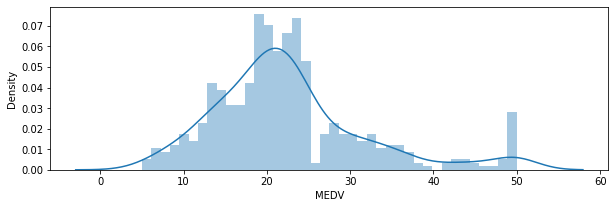

In [10]:
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize = (10,3))
sns.distplot(df['MEDV'], bins = 40, ax = ax)
plt.show()

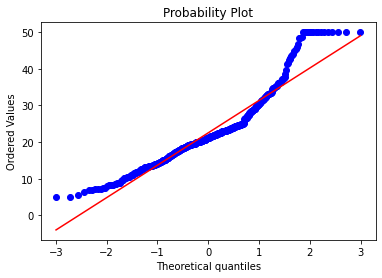

In [11]:
import scipy.stats as stats
stats.probplot(df['MEDV'], dist = "norm", plot = plt)
plt.show()

**Feature selection:** qué variables explican más nuestra variable target y qué correlaciones hay entre variables?

<AxesSubplot:>

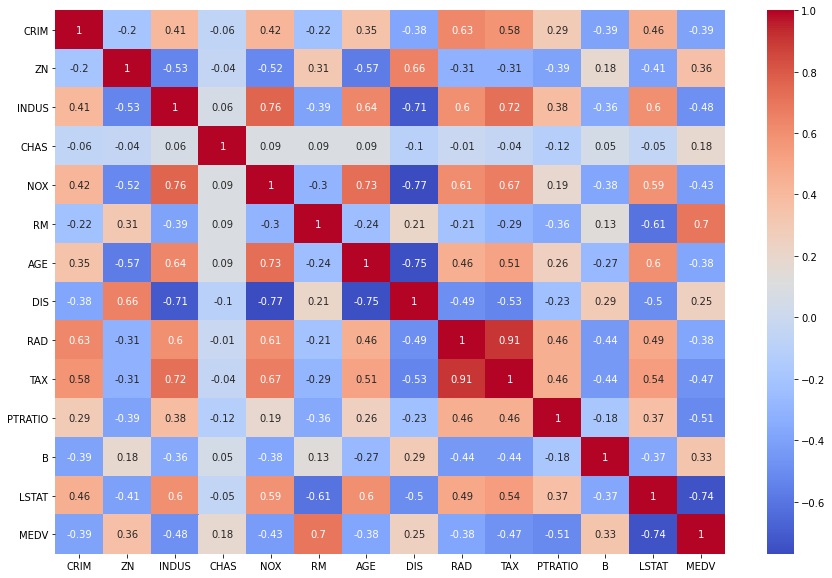

In [12]:
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data = correlation_matrix, annot = True, ax = ax, cmap = 'coolwarm')

Para la regresión, debemos escoger las variables más informativas respecto nuestra variable target (omitimos las demás). Escojamos las que tengan mayor correlación (>0.6 en valor absoluto, por ejemplo):

In [13]:
corr_target = correlation_matrix.loc['MEDV',:]
corr_target[np.abs(corr_target) > 0.6]

RM       0.70
LSTAT   -0.74
MEDV     1.00
Name: MEDV, dtype: float64

In [14]:
np.abs(correlation_matrix).nlargest(3, 'MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.39,0.36,0.48,0.18,0.43,0.70,0.38,0.25,0.38,0.47,0.51,0.33,0.74,1.00
LSTAT,0.46,0.41,0.60,0.05,0.59,0.61,0.60,0.50,0.49,0.54,0.37,0.37,1.00,0.74
RM,0.22,0.31,0.39,0.09,0.30,1.00,0.24,0.21,0.21,0.29,0.36,0.13,0.61,0.70


Debemos comprovar que entre si estas variables no esten correlacionadas (a esto se le llama multicolinearidad, cuando la correlación es muy alta), si no, tendremos redundancia:

In [15]:
correlation_matrix.loc['RM','LSTAT']

-0.61

VIF: Variance Inflation Factor (concepto de estadística)

(hay que instalar el módulo `statsmodels`)

In [18]:
#! pip3 install statsmodels
"""
Si no va, probar
import sys
!{sys.executable} -m pip install statsmodels
"""

     |████████████████████████████████| 9.6 MB 5.3 MB/s eta 0:00:01
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.Series([variance_inflation_factor(add_constant(df).values, i) 
               for i in range(add_constant(df).shape[1])], 
              index = add_constant(df).columns)

const      645.977937
CRIM         1.831537
ZN           2.352186
INDUS        3.992503
CHAS         1.095223
NOX          4.586920
RM           2.260374
AGE          3.100843
DIS          4.396007
RAD          7.808198
TAX          9.205542
PTRATIO      1.993016
B            1.381463
LSTAT        3.581585
MEDV         3.855684
dtype: float64

In [20]:
correlation_matrix.loc['TAX','RAD']

0.91

Sigamos con nuestras dos variables ...

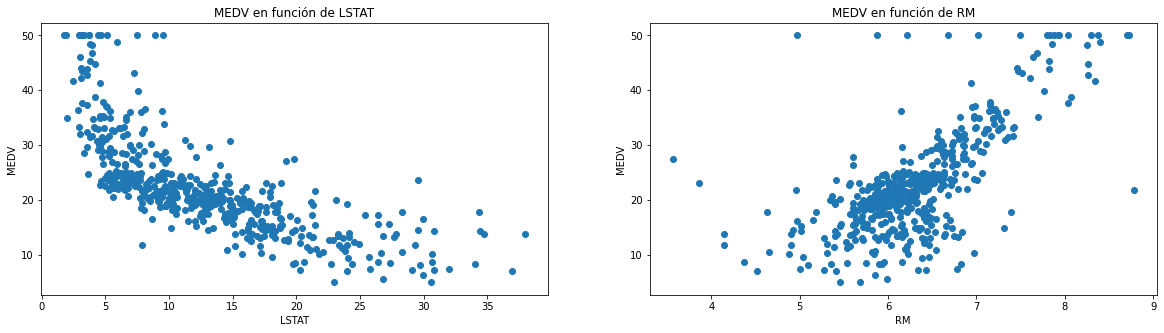

In [21]:
plt.figure(figsize = (20, 5))

X = ['LSTAT', 'RM']
Y = df['MEDV']

for i, col in enumerate(X):
    plt.subplot(1, len(X) , i + 1)
    x = df[col]
    y = Y
    plt.scatter(x, y, marker = 'o')
    plt.title("MEDV en función de " + col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Para juntar dos columnas tenemos varias maneras ...

In [22]:
pd.DataFrame(np.vstack((df['LSTAT'], df['RM'])).T,  columns = ['LSTAT','RM']).head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [23]:
pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM']).head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [24]:
pd.concat((df['LSTAT'], df['RM']), axis = 1).head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


Definimos nuestra $X$ e $Y$:

In [25]:
df[['LSTAT', 'RM']].head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [26]:
X = pd.concat((df['LSTAT'], df['RM']), axis = 1)
Y = df['MEDV']

Y los sets de train y test:

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 123)

print(X_train.shape), print(X_test.shape), print(Y_train.shape), print(Y_test.shape);

(303, 2)
(203, 2)
(303,)
(203,)


Entrenamos el modelo lineal más simple:

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, Y_train);

In [29]:
modelo_lineal.coef_

array([-0.61513492,  5.82634594])

Evaluamos el modelo:

In [30]:
prediccion_train_lineal_simple = modelo_lineal.predict(X_train)
mean_squared_error(Y_train, prediccion_train_lineal_simple) 

26.386012813383246

In [31]:
prediccion_test_lineal_simple = modelo_lineal.predict(X_test)
mean_squared_error(Y_test, prediccion_test_lineal_simple) 

37.17653979369067

In [32]:
from sklearn.model_selection import cross_val_score

resultados = []
nombres = []

scores = -cross_val_score(modelo_lineal, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Lineal simple")

27.274342124728605


Podemos pintar las curvas de aprenidzaje según el tamaño del training set:

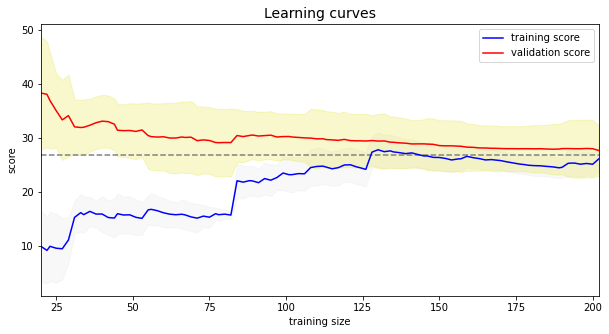

In [33]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 1, figsize = (10, 5))
train_sizes, train_scores, test_scores = learning_curve(
                                                estimator = LinearRegression(),
                                                X = X_train,
                                                y = Y_train, 
                                                train_sizes = np.linspace(0.1, 1.0, 100), 
                                                cv = 3,
                                                scoring = 'neg_mean_squared_error')
train_scores *= -1 
test_scores *= -1

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

ax.plot(train_sizes, np.mean(train_scores, 1), color = 'blue', label = 'training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD", alpha = 0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDD00", alpha = 0.2)

ax.plot(train_sizes, np.mean(test_scores, 1), color = 'red', label = 'validation score')
ax.hlines(np.mean([train_scores[-1], test_scores[-1]]), train_sizes[0], train_sizes[-1],
                 color = 'gray', linestyle = 'dashed')

#ax.set_ylim(0, 1)
ax.set_xlim(train_sizes[0], train_sizes[-1])
ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.set_title('Learning curves', size = 14)
ax.legend(loc = 'best')

Vamos a regularizar:

In [34]:
from sklearn.linear_model import Ridge

modelo_ridge = Ridge(alpha = 1.0)
modelo_ridge.fit(X_train, Y_train)

prediccion_train = modelo_ridge.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train)) 

prediccion_test = modelo_ridge.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

26.387124756605747
37.11055323965819


In [35]:
scores = -cross_val_score(modelo_ridge, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Lineal ridge")

27.27143629122736


In [24]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit(X_train).transform(X_train)
X_test_s = scaler.fit(X_test).transform(X_test)

modelo_ridge = Ridge(alpha = 1.0)
modelo_ridge.fit(X_train_s, Y_train)


prediccion_train = modelo_ridge.predict(X_train_s)
print(mean_squared_error(Y_train, prediccion_train)) # root mean squared error

prediccion_test = modelo_ridge.predict(X_test_s)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(modelo_ridge, X_train_s, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Lineal ridge std.")

26.3862604313691
37.41000946247227
27.26938402135645


In [39]:
np.logspace(-6, 6, 13)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [40]:
modelo_ridge = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13), cv = 5)
modelo_ridge.fit(X_train_s, Y_train)

modelo_ridge.alpha_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


10.0

In [41]:
prediccion_train = modelo_ridge.predict(X_train_s)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = modelo_ridge.predict(X_test_s)
print(mean_squared_error(Y_test, prediccion_test))

26.409864859647467
37.23245853635702


In [42]:
modelo_lasso = linear_model.Lasso(alpha = 0.1)
modelo_lasso.fit(X_train_s, Y_train)

prediccion_train = modelo_lasso.predict(X_train_s)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = modelo_lasso.predict(X_test_s)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(modelo_lasso, X_train_s, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Lineal lasso std.")

26.39857592490084
37.27078358339332
27.283591340852706


In [43]:
modelo_lasso = linear_model.LassoCV(alphas = np.logspace(-6, 6, 13), cv = 5)
modelo_lasso.fit(X_train_s, Y_train)

modelo_lasso.alpha_

0.01

In [44]:
prediccion_train = modelo_ridge.predict(X_train_s)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = modelo_ridge.predict(X_test_s)
print(mean_squared_error(Y_test, prediccion_test))

26.409864859647467
37.23245853635702


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

poly = Pipeline([('poly', PolynomialFeatures(degree = 6)),
                 ('linear', LinearRegression(fit_intercept = True))])
poly.fit(X_train, Y_train)

prediccion_train = poly.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

17.424588597169624
97.62132626177434


In [25]:
poly.fit(X_train_s, Y_train)

prediccion_train = poly.predict(X_train_s)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly.predict(X_test_s)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(poly, X_train_s, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

#resultados.append(scores)
#nombres.append("Polinomial std.")

18.082415781044727
96.43190768409244
6034.287326982404


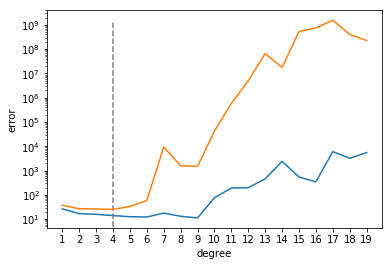

In [51]:
err = []
err2 = []
ini = 1
end = 20
for deg in range(ini, end):
    poly = Pipeline([('poly', PolynomialFeatures(degree = deg)),
                 ('linear', LinearRegression(fit_intercept = False))])
    poly.fit(X_train, Y_train)

    prediccion_train = poly.predict(X_train)
    err.append(mean_squared_error(Y_train, prediccion_train))
    prediccion_test = poly.predict(X_test)
    err2.append(mean_squared_error(Y_test, prediccion_test))

plt.plot(np.arange(ini, end, 1.0), err, label = 'train')
plt.plot(np.arange(ini, end, 1.0), err2, label = 'test')
plt.xticks(np.arange(ini, end, 1.0))
plt.vlines(np.argmin(err2) + ini, 0, max(err2),  color = 'gray', linestyle = 'dashed')
plt.yscale('log')
plt.ylabel('error')
plt.xlabel('degree');

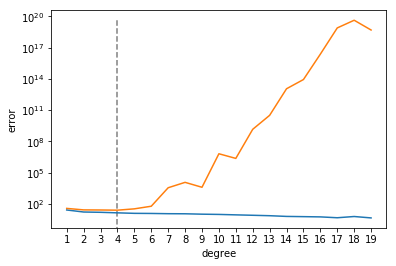

In [52]:
err = []
err2 = []
ini = 1
end = 20
for deg in range(ini, end):
    poly = Pipeline([('poly', PolynomialFeatures(degree = deg)),
                 ('linear', LinearRegression(fit_intercept = False))])
    poly.fit(X_train_s, Y_train)

    prediccion_train = poly.predict(X_train_s)
    err.append(mean_squared_error(Y_train, prediccion_train))
    prediccion_test = poly.predict(X_test_s)
    err2.append(mean_squared_error(Y_test, prediccion_test))

plt.plot(np.arange(ini, end, 1.0), err, label = 'train')
plt.plot(np.arange(ini, end, 1.0), err2, label = 'test')
plt.xticks(np.arange(ini, end, 1.0))
plt.vlines(np.argmin(err2) + ini, 0, max(err2),  color = 'gray', linestyle = 'dashed')
plt.yscale('log')
plt.ylabel('error')
plt.xlabel('degree');

In [134]:
np.abs(correlation_matrix).nlargest(6, 'MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.39,0.36,0.48,0.18,0.43,0.70,0.38,0.25,0.38,0.47,0.51,0.33,0.74,1.00
LSTAT,0.46,0.41,0.60,0.05,0.59,0.61,0.60,0.50,0.49,0.54,0.37,0.37,1.00,0.74
RM,0.22,0.31,0.39,0.09,0.30,1.00,0.24,0.21,0.21,0.29,0.36,0.13,0.61,0.70
PTRATIO,0.29,0.39,0.38,0.12,0.19,0.36,0.26,0.23,0.46,0.46,1.00,0.18,0.37,0.51
INDUS,0.41,0.53,1.00,0.06,0.76,0.39,0.64,0.71,0.60,0.72,0.38,0.36,0.60,0.48
TAX,0.58,0.31,0.72,0.04,0.67,0.29,0.51,0.53,0.91,1.00,0.46,0.44,0.54,0.47


In [26]:
X = pd.concat((df['LSTAT'], df['RM'], df['PTRATIO'], df['INDUS'], df['TAX']), axis = 1)
Y = df['MEDV']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 123)

scaler = preprocessing.StandardScaler()

X_train_s = scaler.fit(X_train).transform(X_train)
X_test_s = scaler.fit(X_test).transform(X_test)

In [28]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, Y_train)

prediccion_train = modelo_lineal.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = modelo_lineal.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(modelo_lineal, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Lineal +")

23.68141338132004
32.460822146543514
25.45788688968373


In [29]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('linear', LinearRegression(fit_intercept = False))])
poly.fit(X_train, Y_train)

prediccion_train = poly.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(poly, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Polinomial +")

10.308842796481919
18.53980737684874
13.754326297934275


In [30]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('ridge', Ridge(alpha = 15))])
poly.fit(X_train, Y_train)

prediccion_train = poly.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(poly, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Polinomial ridge +")

10.345829574102337
18.965639383178445
13.236355435538538


In [32]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('lasso', linear_model.Lasso(alpha = 0.05))])
poly.fit(X_train, Y_train)

prediccion_train = poly.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(poly, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Polinomial lasso +")

10.389694113595002
19.16547430591474
13.147462545051422


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1611.0634460595288, tolerance: 2.5400913531353146
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1399.1144750859737, tolerance: 2.0854859049586785
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1173.9974845499387, tolerance: 1.8137884793388432
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1361.1

In [53]:
from sklearn.decomposition import PCA

X = df.drop(['MEDV'], axis = 1)
pca = PCA()
PCs = preprocessing.StandardScaler().fit_transform(pca.fit_transform(X))

In [54]:
['PC' + str(i) for i in range(1, X.shape[1] + 1)]

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13']

[0.80582318 0.96887514 0.99022375 0.99718074 0.99848069 0.99920791
 0.99962696 0.9998755  0.99996089 0.9999917  0.99999835 0.99999992
 1.        ]


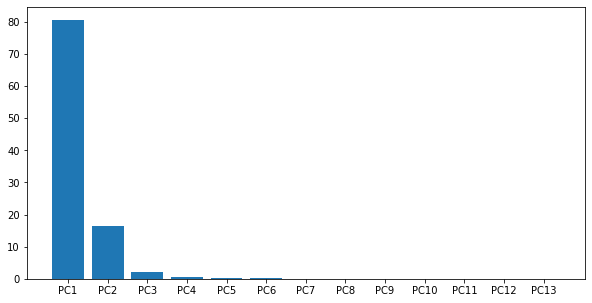

In [55]:
print(np.cumsum(pca.explained_variance_ratio_))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x = range(1, X.shape[1] + 1), 
        height = np.round(pca.explained_variance_ratio_ * 100, decimals = 1), 
        tick_label = ['PC' + str(i) for i in range(1, X.shape[1] + 1)]);

In [56]:
X_pca = pd.DataFrame(PCs,
                     columns = ['PC' + str(i) for i in range(1, X.shape[1] + 1)])
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.682412,-0.070398,-0.111016,0.324352,-0.257896,-1.196685,-0.257897,1.776495,-1.070846,-0.303190,0.749805,-0.291175,0.607564
1,-0.961890,0.128084,-1.077089,0.079487,0.052421,-0.614607,-0.157008,0.296936,0.258755,1.197278,0.096455,-0.386817,-0.600412
2,-0.964291,0.178278,-0.586226,-0.630022,-0.013245,-1.120471,0.429264,0.165400,0.229587,0.838812,-0.926360,-0.437951,-0.081667
3,-1.083432,0.231733,-0.228638,-1.204150,0.214607,-1.319510,-0.492359,0.274339,0.588392,0.888348,-0.547360,-0.214230,0.791772
4,-1.082879,0.203821,-0.460430,-0.869060,0.249711,-1.092207,-0.764157,0.334949,0.588059,1.034580,-1.066279,-0.226206,0.643658


In [57]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

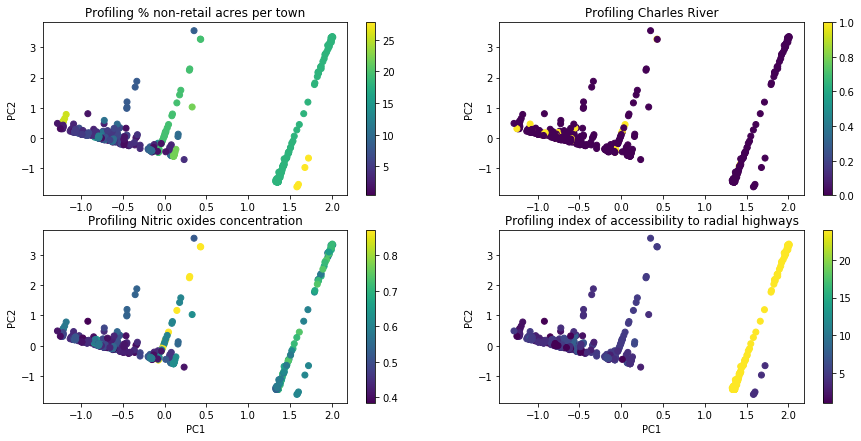

In [60]:
fig, ax = plt.subplots(2,2, figsize = (15,7))

im1 = ax[0,0].scatter(X_pca['PC1'], X_pca['PC2'], c = df['INDUS']) 
fig.colorbar(im1, ax = ax[0,0])
im2 = ax[0,1].scatter(X_pca['PC1'], X_pca['PC2'], c = df['CHAS'])
fig.colorbar(im2, ax = ax[0,1])
im3 = ax[1,0].scatter(X_pca['PC1'], X_pca['PC2'], c = df['NOX'])
fig.colorbar(im3, ax = ax[1,0])
im4 = ax[1,1].scatter(X_pca['PC1'], X_pca['PC2'], c = df['RAD'])
fig.colorbar(im4, ax = ax[1,1])
 
ax[0,0].set_ylabel("PC2") 
ax[0,1].set_ylabel("PC2")
ax[1,0].set_xlabel("PC1"), ax[1,0].set_ylabel("PC2")
ax[1,1].set_xlabel("PC1"), ax[1,1].set_ylabel("PC2")

ax[0,0].set_title("Profiling % non-retail acres per town")
ax[0,1].set_title("Profiling Charles River")
ax[1,0].set_title("Profiling Nitric oxides concentration")
ax[1,1].set_title("Profiling index of accessibility to radial highways");

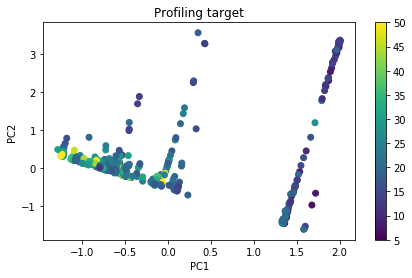

In [61]:
fig, ax = plt.subplots(1,1, figsize = (7,4))

im1 = ax.scatter(X_pca['PC1'], X_pca['PC2'], c = df['MEDV'], marker = 'o') 
fig.colorbar(im1, ax = ax)

ax.set_xlabel("PC1"), ax.set_ylabel("PC2")
ax.set_title("Profiling target");

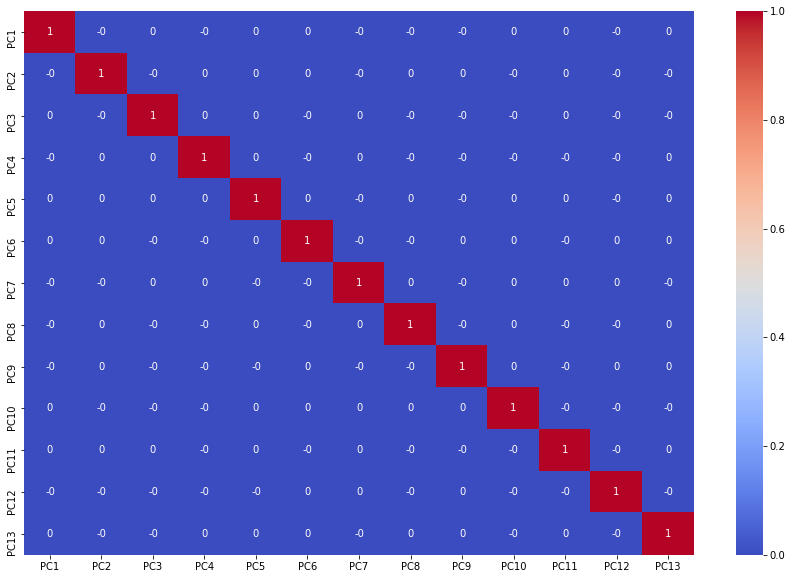

In [64]:
correlation_matrix = X_pca.corr().round(2)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data = correlation_matrix, annot = True, ax = ax, cmap = 'coolwarm');

In [62]:
X = X_pca
Y = df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 123)

In [63]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, Y_train)

prediccion_train = modelo_lineal.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = modelo_lineal.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(modelo_lineal, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Lineal pca")

20.565671836734506
25.983399101241464
23.410830855005294


In [64]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('linear', LinearRegression(fit_intercept = False))])
poly.fit(X_train, Y_train)

prediccion_train = poly.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(poly, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Polinomial pca")

5.009629897718456
19.957819492215545
4.5289230832690096e+20


In [65]:
steps = [
    ('poly', PolynomialFeatures(degree = 2)),
    ('model', Ridge(alpha = 15))
]

poly_ridge = Pipeline(steps)
poly_ridge.fit(X_train, Y_train)

prediccion_train = poly_ridge.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly_ridge.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(poly_ridge, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Polinomial ridge pca")

5.72094491284818
14.688597918442136
16.489966080984487


In [66]:
steps = [
    ('poly', PolynomialFeatures(degree = 2)),
    ('model', linear_model.Lasso(alpha = 0.05))
]

poly_lasso = Pipeline(steps)
poly_lasso.fit(X_train, Y_train)

prediccion_train = poly_lasso.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly_lasso.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

scores = -cross_val_score(poly_lasso, X_train, Y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultados.append(scores)
nombres.append("Polinomial lasso pca")

6.010933749429907
13.88336040738226
14.205860199402931


Tener muchos hiperparámetros no nos alegra demasiado ...

Se tiene que probar todas las posibles combinaciones ...

Y la única forma es exhaustivamente ...

`GridSearchCV` nos lo permite:

In [77]:
np.arange(0, 100, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [67]:
import warnings
warnings.filterwarnings('ignore')

# Grid search para buscar el mejor subconjunto de params
from sklearn.model_selection import GridSearchCV

parameters = [ {'model__alpha': np.arange(0, 100, 1), 'poly__degree': [2,3,4]} ]

from sklearn.metrics import fbeta_score, make_scorer
scoring_func = make_scorer(mean_squared_error)
grid_search = GridSearchCV(estimator = poly_ridge, 
                           param_grid = parameters,
                           scoring = scoring_func,
                           cv = 10,
                           n_jobs = 2)
grid_search = grid_search.fit(X_train, Y_train) 

In [78]:
grid_search.cv_results_['mean_test_score'][::3]

array([32.0158123 , 23.15965167, 21.27574698, 20.07631166, 19.21225572,
       18.55239037, 18.03091768, 17.60941117, 17.26323528, 16.97557596,
       16.73443166, 16.53094239, 16.35839277, 16.21158366, 16.08641843,
       15.97962095, 15.88853771, 15.81099547, 15.74519692, 15.68964261,
       15.64307182, 15.60441699, 15.57276833, 15.54734585, 15.52747728,
       15.51258021, 15.50214773, 15.49573674, 15.49295833, 15.49346981,
       15.49696821, 15.50318468, 15.51187994, 15.52284037, 15.5358747 ,
       15.55081121, 15.56749533, 15.58578758, 15.60556182, 15.62670369,
       15.6491093 , 15.67268407, 15.69734173, 15.72300344, 15.74959704,
       15.77705631, 15.80532047, 15.83433354, 15.86404398, 15.89440417,
       15.92537016, 15.95690121, 15.98895961, 16.02151035, 16.05452091,
       16.08796103, 16.12180253, 16.15601915, 16.19058638, 16.22548132,
       16.26068256, 16.29617003, 16.33192498, 16.36792978, 16.40416791,
       16.44062384, 16.47728297, 16.51413158, 16.55115673, 16.58

In [70]:
len(grid_search.cv_results_['mean_test_score'])

300

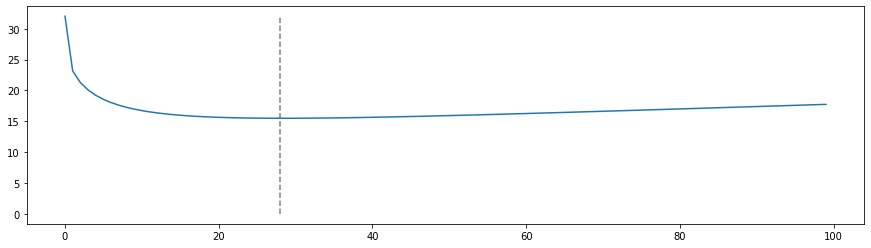

In [80]:
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(np.arange(0, 100, 1), grid_search.cv_results_['mean_test_score'][::3])
plt.vlines(np.argmin(grid_search.cv_results_['mean_test_score'][::3]), 0, max(grid_search.cv_results_['mean_test_score'][::3]),  color = 'gray', linestyle = 'dashed')

In [83]:
np.argmin(grid_search.cv_results_['mean_test_score'][::3])

28

In [81]:
pasos = [
    ('poly', PolynomialFeatures(degree = 2)),
    ('model', Ridge(alpha = 15))
]

poly_ridge = Pipeline(pasos)
poly_ridge.fit(X_train, Y_train)

prediccion_train = poly_ridge.predict(X_train)
print(mean_squared_error(Y_train, prediccion_train))

prediccion_test = poly_ridge.predict(X_test)
print(mean_squared_error(Y_test, prediccion_test))

6.651528966081491
14.459233126435358


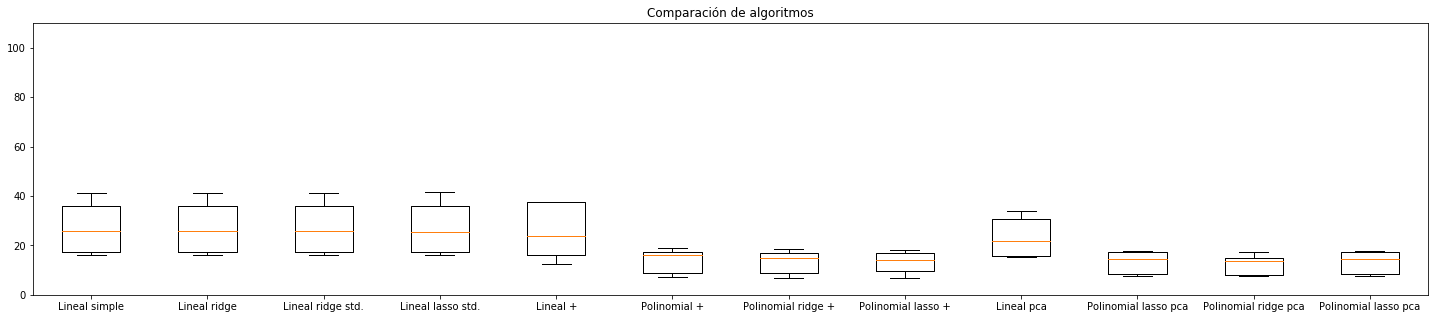

In [82]:
fig, ax = plt.subplots(1, 1, figsize = (25,5)) 
ax.set_title('Comparación de algoritmos')
ax.boxplot(resultados)
ax.set_xticklabels(nombres)
ax.set_ylim(0,110)
plt.show()

### Recta final

Siempre es mejor k-fold CV con varias repeticiones (así la variancia de los resultados es más acurada).
Escogemos unos cuantos pipelines y hacemos nk-fold CV para escoger el mejor modelo.

In [86]:
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits = 5, n_repeats = 20, random_state = 123)
X = pd.concat((df['LSTAT'], df['RM'], df['PTRATIO'], df['INDUS'], df['TAX']), axis = 1)
list(rkf.split(X))

[(array([  0,   1,   2,   3,   4,   6,   7,   8,  10,  12,  14,  16,  17,
          18,  19,  20,  21,  22,  23,  25,  27,  28,  29,  30,  31,  32,
          35,  37,  38,  39,  40,  43,  44,  45,  46,  47,  50,  51,  52,
          53,  54,  56,  57,  58,  60,  61,  62,  63,  64,  65,  67,  68,
          69,  70,  71,  73,  74,  76,  77,  78,  79,  80,  81,  83,  84,
          86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  97,  98,  99,
         100, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115,
         116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129,
         130, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
         145, 146, 147, 149, 150, 151, 152, 153, 154, 156, 157, 158, 161,
         163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176,
         177, 178, 180, 181, 182, 183, 184, 186, 187, 192, 193, 194, 195,
         197, 198, 202, 203, 204, 205, 206, 207, 208, 210, 213, 214, 215,
         217, 218, 219, 220, 221, 222,

In [87]:
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

X = pd.concat((df['LSTAT'], df['RM'], df['PTRATIO'], df['INDUS'], df['TAX']), axis = 1)
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 123)

pipelines = []

pipelines.append(('scaled_linear', Pipeline([('scaler', preprocessing.StandardScaler()),
                                        ('linear', LinearRegression())
                                       ])))
pipelines.append(('scaled_linear_ridge', Pipeline([('scaler', preprocessing.StandardScaler()),
                                        ('ridge', Ridge(alpha = 15))
                                       ])))
pipelines.append(('scaled_poly', Pipeline([('scaler', preprocessing.StandardScaler()),
                                           ('poly', PolynomialFeatures(degree = 2)),
                                           ('linear', LinearRegression())
                                       ])))
pipelines.append(('scaled_poly_ridge', Pipeline([('scaler', preprocessing.StandardScaler()),
                                        ('poly', PolynomialFeatures(degree = 2)),
                                        ('ridge', Ridge(alpha = 15))
                                       ])))
pipelines.append(('scaled_poly_lasso', Pipeline([('scaler', preprocessing.StandardScaler()),
                                        ('poly', PolynomialFeatures(degree = 2)),
                                        ('lasso', Ridge(alpha = 0.05))
                                       ])))
pipelines.append(('poly_ridge', Pipeline([('poly', PolynomialFeatures(degree = 2)),
                                        ('ridge', Ridge(alpha = 15))
                                       ])))
pipelines.append(('poly_lasso', Pipeline([('poly', PolynomialFeatures(degree = 2)),
                                        ('lasso', Ridge(alpha = 0.05))
                                       ])))
resultados = []
nombres = []

for nombre, modelo in pipelines:
    
    modelo.fit(X_train, Y_train)
    #prediccion_train = modelo.predict(X_train)
    #prediccion_test = modelo.predict(X_test)
    
    rkf = RepeatedKFold(n_splits = 5, n_repeats = 20, random_state = 123)
    resultados_nk = []
    for train_index, test_index in rkf.split(X):
        X_train_nk, X_test_nk = X.values[train_index], X.values[test_index]
        Y_train_nk, Y_test_nk = Y.values[train_index], Y.values[test_index]
        scores = -cross_val_score(modelo, X_train_nk, Y_train_nk, cv = 5, scoring = 'neg_mean_squared_error')
        resultados_nk.append(scores.mean())
        
    resultados.append(resultados_nk)
    nombres.append(nombre)
    print("%s: %f (%f)" % (nombre, np.mean(resultados_nk), np.std(resultados_nk)))
    #print(f"{}")
    """
    print("Métricas: \n \t MSE: {} \n \t MAE: {} \n \t RMSE: {} \n \t R2: {} \n".format(
    metrics.mean_squared_error(Y_test, prediccion_test),
    metrics.mean_absolute_error(Y_test, prediccion_test),
    np.sqrt(metrics.mean_squared_error(Y_test, prediccion_test)),
    metrics.r2_score(Y_test, prediccion_test)))
    """

scaled_linear: 38.204508 (3.927015)
scaled_linear_ridge: 37.062648 (3.667702)
scaled_poly: 27.825005 (3.430877)
scaled_poly_ridge: 24.031702 (2.737462)
scaled_poly_lasso: 27.779470 (3.423337)
poly_ridge: 25.927135 (3.052040)
poly_lasso: 27.335127 (3.369697)


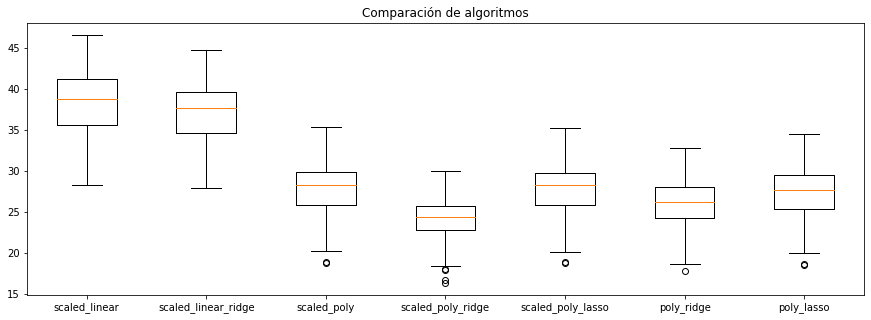

In [88]:
fig, ax = plt.subplots(1, 1, figsize = (15,5)) 
ax.set_title('Comparación de algoritmos')
ax.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

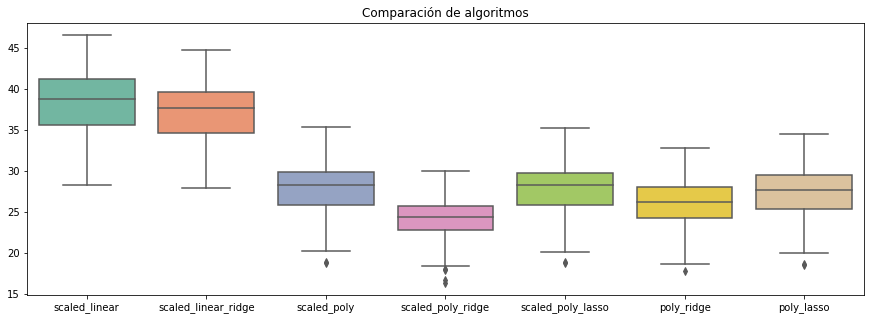

In [90]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize = (15,5)) 
ax.set_title('Comparación de algoritmos')
sns.boxplot(x = nombres, y = resultados, palette = "Set2", ax = ax);

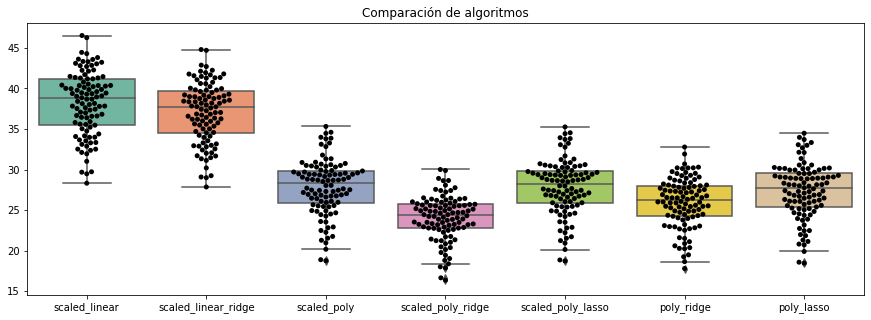

In [91]:
fig, ax = plt.subplots(1, 1, figsize = (15,5)) 
ax.set_title('Comparación de algoritmos')
sns.swarmplot(data = resultados, color = "black", ax = ax)
sns.boxplot(x = nombres, y = resultados, palette = "Set2", ax = ax);

---
## A practicar

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Predicción de la calidad (entero del 1 al 10) de vino a partir de sus características, como la la acidez, los sulfatos, el % de alcohol, etc.

In [162]:
df = pd.read_csv('data/winequality-red.csv')

In [142]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
df.shape

(1599, 12)

**Pistas:**

- Comprueba si hay valores nulos.
- Calcula la matriz de correlación y pinta el heatmap. ¿Qué variables estan más correlacionadas con la variable target?
- Entrena varios modelos (usando pipeline) con nk-fold CV y pinta los boxplots. ¿Qué modelo tiene el menor error?
- Puedes probar también predecir con Componentes Principales (PCs).
---